In [1]:
%pylab inline
#plt.style.use('seaborn-whitegrid')
pylab.rcParams['figure.figsize'] = (10.0, 10.0)

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Obstacles
def plot_cir(r):
    ax.add_patch(Circle(
        r[0],
        r[1],
        color=r[2]
    ))
    plot()

def plot_cell(r):
    ax.add_patch(Rectangle(
        r,
        1,
        1,
        facecolor='b'
    ))

In [3]:
# Define a class called Tree
class Tree:
    def __init__(self):
        self.data = None
        self.π = None

# Breadth First Search
def bfs(s,g):
    path_inv = []
    tree = []
    t = Tree()
    t.data = s
    tree.append(t)
    Q = [t]
    not_visited = V
    not_visited.remove(s)
    while len(Q) > 0:
        x = Q[0]
        Q.remove(x)
        if x.data == g:
            print('success')
            path_inv.append(x)
            while x.π:
                x = x.π
                path_inv.append(x)
        for x1 in adj(x.data):
            if x1 in not_visited:
                not_visited.remove(x1)
                t = Tree()
                t.data = x1
                t.π = x
                tree.append(t)
                Q.append(t)
    path = []
    for i in range(len(path_inv)-1,-1,-1):
        path.append(path_inv[i].data)
    return path

def adj(x):
    ret = []
    for e in E:
        if e[0] == x:
            ret.append(e[1])
        if e[1] == x:
            ret.append(e[0])
    return ret

In [4]:
# Obstacles info
sphere9 = ((-7.425,-7.925),1.5/2,'g')
omnirob = ((7.625,8.55),0.1,'b')

cs = [(-9,5),(-9,6),(-9,7),
      (-8,-7),(-8,-6),(-8,-5),(-8,5),(-8,6),(-8,7),
      (-7,-7),(-7,-6),(-7,-5),(-7,-2),(-7,-1),(-7,3),(-7,5),(-7,6),(-7,7),
      (-6,-8),(-6,-7),(-6,-6),(-6,-5),(-6,-2),(-6,-1),(-6,2),(-6,3),(-6,4),(-6,5),(-6,6),(-6,7),
      (-5,-8),(-5,-7),(-5,-6),(-5,-2),(-5,-1),(-5,2),(-5,3),(-5,4),(-5,5),(-5,6),(-5,7),
      (-4,-9),(-4,-8),(-4,-7),(-4,-6),(-4,-3),(-4,-2),(-4,-1),
      (-3,-8),(-3,-7),(-3,-3),(-3,-2),(-3,-1),(-3,1),(-3,2),(-3,3),
      (-2,-3),(-2,-2),(-2,-1),(-2,1),(-2,2),(-2,3),(-2,5),(-2,6),(-2,7),
      (-1,-3),(-1,-2),(-1,-1),(-1,1),(-1,2),(-1,5),(-1,6),(-1,7),
      (0,-3),(0,-2),(0,0),(0,1),(0,-1),(0,5),(0,6),(0,7),
      (1,-6),(1,-5),(1,-3),(1,-2),(1,-1),(1,0),(1,1),(1,2),(1,3),(1,4),
      (2,-6),(2,-5),(2,-4),(2,-2),(2,-1),(2,0),(2,1),(2,2),(2,3),(2,4),(2,5),
      (3,-6),(3,-5),(3,-4),(3,-3),(3,-2),(3,-1),(3,0),(3,1),(3,3),(3,4),
      (4,-3),(4,-2),(4,-1),(4,0),(4,1),(4,4),(4,5),
      (5,-1),(5,0),(5,1),(5,3),(5,4),(5,5),
      (6,-9),(6,-8),(6,-7),(6,3),(6,4),(6,5),
      (7,-9),(7,-8),(7,-7),(7,3),(7,4),(7,5),
      (8,-9),(8,-8),(8,3),(8,4),(8,5),
      (9,3),(9,4),(9,5)
      ]

success


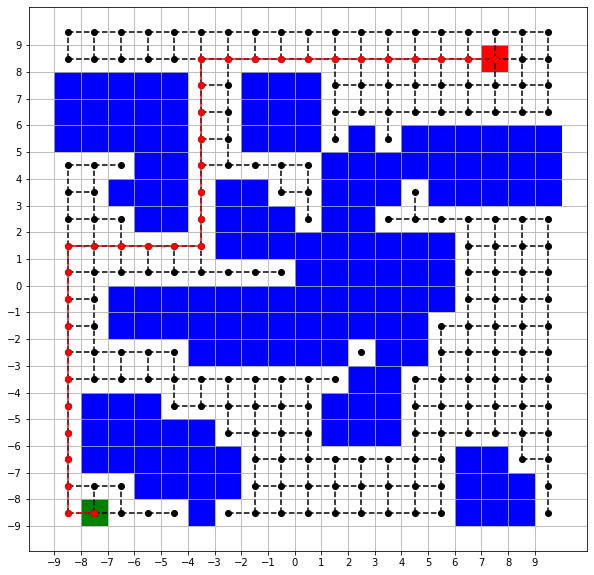

In [5]:
# Initialize the graph
fig = plt.figure()
ax = fig.gca()
    
ax.add_patch(Rectangle(
        (7,8),
        1,
        1,
        facecolor='r'
    ))

ax.add_patch(Rectangle(
        (-8,-9),
        1,
        1,
        facecolor='g'
    ))

# Label cells
for c in cs:
    plot_cell(c)

# Store all vertices and edges
V = []
E = []

# Draw vertices and edges
for i in range(-9,10):
    for j in range(-9,10):
        if (i,j) in cs:
            continue
        plot(i+0.5,j+0.5,'o',color='k')
        V.append((i,j))
        if (not (i-1,j) in cs) and i > -9:
            plot([i-0.5,i+0.5],[j+0.5,j+0.5],'--',color='k')
            E.append(((i-1,j),(i,j)))
        if (not (i,j-1) in cs) and j > -9:
            plot([i+0.5,i+0.5],[j-0.5,j+0.5],'--',color='k')
            E.append(((i,j-1),(i,j)))

# BFS
traj = bfs((7,8),(-8,-9))
for i in range(0,len(traj)):
    plot(traj[i][0]+0.5,traj[i][1]+0.5,'o',color='r')
    if i > 0:
        plot([traj[i-1][0]+0.5,traj[i][0]+0.5],[traj[i-1][1]+0.5,traj[i][1]+0.5],'--',color='r')

# Draw grid
ax.set_xticks(numpy.arange(-9,10,1))
ax.set_yticks(numpy.arange(-9,10,1))
plt.grid()
plt.show()